In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=729da12e5444447a0de3cdcef3bff352e135b06a988d820d36143fd6cab597e8
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.master("local[1]").appName("Medical Diagnosis").getOrCreate()
sc=spark.sparkContext

In [ ]:
'''{"username":"ashokkumarr21alr008","key":"294691ccfa3249554d6bc8205bcb25f3"}'''

'{"username":"ashokkumarr21alr008","key":"294691ccfa3249554d6bc8205bcb25f3"}'

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ashokkumarr21alr008
Your Kaggle Key: ··········


100%|██████████| 67.4k/67.4k [00:00<00:00, 46.7MB/s]

In [ ]:
# Load the dataset
df = spark.read.csv("/content/stroke-prediction-dataset", header=True, inferSchema=True)

#*PREPROCESSING*#


In [ ]:
# Preprocess the data
df = df.dropna() # Remove any missing values


In [ ]:
df = df.withColumnRenamed("stroke", "stroke_occurred") # Rename the label column to "stroke_occurred

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [ ]:
df.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+---------------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke_occurred|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+---------------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|              1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21| N/A|   never smoked|              1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|              1|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|         

In [ ]:
df

DataFrame[id: int, gender: string, age: double, hypertension: int, heart_disease: int, ever_married: string, work_type: string, Residence_type: string, avg_glucose_level: double, bmi: string, smoking_status: string, stroke_occurred: int]

In [ ]:
num_rows = df.count()
num_cols = len(df.columns)
print(f'The DataFrame has {num_rows} rows and {num_cols} columns.')

The DataFrame has 5110 rows and 12 columns.


In [ ]:
# import packages
from pyspark.ml.feature import StringIndexer, OneHotEncoder
# conversion
indexer = StringIndexer(inputCol='gender', outputCol='gender1').fit(df)
indexed_df = indexer.transform(df)

In [ ]:
indexed_df  = indexed_df.drop('gender')
indexed_df.show()

+-----+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+---------------+-------+
|   id| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke_occurred|gender1|
+-----+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+---------------+-------+
| 9046|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|              1|    1.0|
|51676|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21| N/A|   never smoked|              1|    0.0|
|31112|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|              1|    1.0|
|60182|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|          

In [ ]:
indexed_df

DataFrame[id: int, age: double, hypertension: int, heart_disease: int, ever_married: string, work_type: string, Residence_type: string, avg_glucose_level: double, bmi: string, smoking_status: string, stroke_occurred: int, gender1: double]

In [ ]:
# conversion
indexer = StringIndexer(inputCol='ever_married', outputCol='ever_married1').fit(indexed_df)
indexed_df = indexer.transform(indexed_df)
indexed_df  = indexed_df.drop('ever_married')
indexed_df.show()

+-----+----+------------+-------------+-------------+--------------+-----------------+----+---------------+---------------+-------+-------------+
|   id| age|hypertension|heart_disease|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke_occurred|gender1|ever_married1|
+-----+----+------------+-------------+-------------+--------------+-----------------+----+---------------+---------------+-------+-------------+
| 9046|67.0|           0|            1|      Private|         Urban|           228.69|36.6|formerly smoked|              1|    1.0|          0.0|
|51676|61.0|           0|            0|Self-employed|         Rural|           202.21| N/A|   never smoked|              1|    0.0|          0.0|
|31112|80.0|           0|            1|      Private|         Rural|           105.92|32.5|   never smoked|              1|    1.0|          0.0|
|60182|49.0|           0|            0|      Private|         Urban|           171.23|34.4|         smokes|              1| 

In [ ]:
# conversion
indexer = StringIndexer(inputCol='work_type', outputCol='work_type1').fit(indexed_df)
indexed_df = indexer.transform(indexed_df)
indexed_df  = indexed_df.drop('work_type')
indexed_df.show()

+-----+----+------------+-------------+--------------+-----------------+----+---------------+---------------+-------+-------------+----------+
|   id| age|hypertension|heart_disease|Residence_type|avg_glucose_level| bmi| smoking_status|stroke_occurred|gender1|ever_married1|work_type1|
+-----+----+------------+-------------+--------------+-----------------+----+---------------+---------------+-------+-------------+----------+
| 9046|67.0|           0|            1|         Urban|           228.69|36.6|formerly smoked|              1|    1.0|          0.0|       0.0|
|51676|61.0|           0|            0|         Rural|           202.21| N/A|   never smoked|              1|    0.0|          0.0|       1.0|
|31112|80.0|           0|            1|         Rural|           105.92|32.5|   never smoked|              1|    1.0|          0.0|       0.0|
|60182|49.0|           0|            0|         Urban|           171.23|34.4|         smokes|              1|    0.0|          0.0|       0.0|

In [ ]:
# conversion
indexer = StringIndexer(inputCol='Residence_type', outputCol='Residence_type1').fit(indexed_df)
indexed_df = indexer.transform(indexed_df)
indexed_df  = indexed_df.drop('Residence_type')
indexed_df.show()

+-----+----+------------+-------------+-----------------+----+---------------+---------------+-------+-------------+----------+---------------+
|   id| age|hypertension|heart_disease|avg_glucose_level| bmi| smoking_status|stroke_occurred|gender1|ever_married1|work_type1|Residence_type1|
+-----+----+------------+-------------+-----------------+----+---------------+---------------+-------+-------------+----------+---------------+
| 9046|67.0|           0|            1|           228.69|36.6|formerly smoked|              1|    1.0|          0.0|       0.0|            0.0|
|51676|61.0|           0|            0|           202.21| N/A|   never smoked|              1|    0.0|          0.0|       1.0|            1.0|
|31112|80.0|           0|            1|           105.92|32.5|   never smoked|              1|    1.0|          0.0|       0.0|            1.0|
|60182|49.0|           0|            0|           171.23|34.4|         smokes|              1|    0.0|          0.0|       0.0|         

In [ ]:
# conversion
indexer = StringIndexer(inputCol='smoking_status', outputCol='smoking_status1').fit(indexed_df)
indexed_df = indexer.transform(indexed_df)
indexed_df  = indexed_df.drop('smoking_status')
indexed_df.show()

+-----+----+------------+-------------+-----------------+----+---------------+-------+-------------+----------+---------------+---------------+
|   id| age|hypertension|heart_disease|avg_glucose_level| bmi|stroke_occurred|gender1|ever_married1|work_type1|Residence_type1|smoking_status1|
+-----+----+------------+-------------+-----------------+----+---------------+-------+-------------+----------+---------------+---------------+
| 9046|67.0|           0|            1|           228.69|36.6|              1|    1.0|          0.0|       0.0|            0.0|            2.0|
|51676|61.0|           0|            0|           202.21| N/A|              1|    0.0|          0.0|       1.0|            1.0|            0.0|
|31112|80.0|           0|            1|           105.92|32.5|              1|    1.0|          0.0|       0.0|            1.0|            0.0|
|60182|49.0|           0|            0|           171.23|34.4|              1|    0.0|          0.0|       0.0|            0.0|         

In [ ]:
indexed_df =indexed_df.na.drop()

In [ ]:
indexed_df.show()

+-----+----+------------+-------------+-----------------+----+---------------+-------+-------------+----------+---------------+---------------+
|   id| age|hypertension|heart_disease|avg_glucose_level| bmi|stroke_occurred|gender1|ever_married1|work_type1|Residence_type1|smoking_status1|
+-----+----+------------+-------------+-----------------+----+---------------+-------+-------------+----------+---------------+---------------+
| 9046|67.0|           0|            1|           228.69|36.6|              1|    1.0|          0.0|       0.0|            0.0|            2.0|
|51676|61.0|           0|            0|           202.21| N/A|              1|    0.0|          0.0|       1.0|            1.0|            0.0|
|31112|80.0|           0|            1|           105.92|32.5|              1|    1.0|          0.0|       0.0|            1.0|            0.0|
|60182|49.0|           0|            0|           171.23|34.4|              1|    0.0|          0.0|       0.0|            0.0|         

In [ ]:
# Import necessary libraries
from pyspark.sql.functions import col
# Remove rows with null or NaN values in a specific column
indexed_df = indexed_df.filter(col("bmi").isNotNull())

In [ ]:
indexed_df.show()

+-----+----+------------+-------------+-----------------+----+---------------+-------+-------------+----------+---------------+---------------+
|   id| age|hypertension|heart_disease|avg_glucose_level| bmi|stroke_occurred|gender1|ever_married1|work_type1|Residence_type1|smoking_status1|
+-----+----+------------+-------------+-----------------+----+---------------+-------+-------------+----------+---------------+---------------+
| 9046|67.0|           0|            1|           228.69|36.6|              1|    1.0|          0.0|       0.0|            0.0|            2.0|
|51676|61.0|           0|            0|           202.21| N/A|              1|    0.0|          0.0|       1.0|            1.0|            0.0|
|31112|80.0|           0|            1|           105.92|32.5|              1|    1.0|          0.0|       0.0|            1.0|            0.0|
|60182|49.0|           0|            0|           171.23|34.4|              1|    0.0|          0.0|       0.0|            0.0|         

In [ ]:
df=indexed_df

In [ ]:
df.show()

+-----+----+------------+-------------+-----------------+----+---------------+-------+-------------+----------+---------------+---------------+
|   id| age|hypertension|heart_disease|avg_glucose_level| bmi|stroke_occurred|gender1|ever_married1|work_type1|Residence_type1|smoking_status1|
+-----+----+------------+-------------+-----------------+----+---------------+-------+-------------+----------+---------------+---------------+
| 9046|67.0|           0|            1|           228.69|36.6|              1|    1.0|          0.0|       0.0|            0.0|            2.0|
|51676|61.0|           0|            0|           202.21| N/A|              1|    0.0|          0.0|       1.0|            1.0|            0.0|
|31112|80.0|           0|            1|           105.92|32.5|              1|    1.0|          0.0|       0.0|            1.0|            0.0|
|60182|49.0|           0|            0|           171.23|34.4|              1|    0.0|          0.0|       0.0|            0.0|         

In [ ]:
#To filter null values(N/A) when it is in string type
df = df.filter(~col('bmi').contains('N/A'))

In [ ]:
df

DataFrame[id: int, age: double, hypertension: int, heart_disease: int, avg_glucose_level: double, bmi: string, stroke_occurred: int, gender1: double, ever_married1: double, work_type1: double, Residence_type1: double, smoking_status1: double]

In [ ]:
df.show()

+-----+----+------------+-------------+-----------------+----+---------------+-------+-------------+----------+---------------+---------------+
|   id| age|hypertension|heart_disease|avg_glucose_level| bmi|stroke_occurred|gender1|ever_married1|work_type1|Residence_type1|smoking_status1|
+-----+----+------------+-------------+-----------------+----+---------------+-------+-------------+----------+---------------+---------------+
| 9046|67.0|           0|            1|           228.69|36.6|              1|    1.0|          0.0|       0.0|            0.0|            2.0|
|31112|80.0|           0|            1|           105.92|32.5|              1|    1.0|          0.0|       0.0|            1.0|            0.0|
|60182|49.0|           0|            0|           171.23|34.4|              1|    0.0|          0.0|       0.0|            0.0|            3.0|
| 1665|79.0|           1|            0|           174.12|  24|              1|    0.0|          0.0|       1.0|            1.0|         

In [ ]:
df

DataFrame[id: int, age: double, hypertension: int, heart_disease: int, avg_glucose_level: double, bmi: string, stroke_occurred: int, gender1: double, ever_married1: double, work_type1: double, Residence_type1: double, smoking_status1: double]

#*DATA TRANSFORMATION*#


In [ ]:
from pyspark.sql.functions import col
df = df.withColumn('bmi', col('bmi').cast('integer'))

In [ ]:
df

DataFrame[id: int, age: double, hypertension: int, heart_disease: int, avg_glucose_level: double, bmi: int, stroke_occurred: int, gender1: double, ever_married1: double, work_type1: double, Residence_type1: double, smoking_status1: double]

In [ ]:
df.show()

+-----+----+------------+-------------+-----------------+---+---------------+-------+-------------+----------+---------------+---------------+
|   id| age|hypertension|heart_disease|avg_glucose_level|bmi|stroke_occurred|gender1|ever_married1|work_type1|Residence_type1|smoking_status1|
+-----+----+------------+-------------+-----------------+---+---------------+-------+-------------+----------+---------------+---------------+
| 9046|67.0|           0|            1|           228.69| 36|              1|    1.0|          0.0|       0.0|            0.0|            2.0|
|31112|80.0|           0|            1|           105.92| 32|              1|    1.0|          0.0|       0.0|            1.0|            0.0|
|60182|49.0|           0|            0|           171.23| 34|              1|    0.0|          0.0|       0.0|            0.0|            3.0|
| 1665|79.0|           1|            0|           174.12| 24|              1|    0.0|          0.0|       1.0|            1.0|            0.0|

In [ ]:
num_rows = df.count()
num_cols = len(df.columns)
print(f'The DataFrame has {num_rows} rows and {num_cols} columns.')

The DataFrame has 4909 rows and 12 columns.


#*CREATE TABLE FOR ANALYSING THE DATAFRAME*#

In [ ]:
df.createOrReplaceTempView("heart_stroke")

In [ ]:
length_df=spark.sql("SELECT id from heart_stroke where id>2000")
length_df.show()

+-----+
|   id|
+-----+
| 9046|
|31112|
|60182|
|56669|
|53882|
|10434|
|60491|
|12109|
|12095|
|12175|
| 5317|
|58202|
|56112|
|34120|
|27458|
|70630|
|13861|
|68794|
|64778|
| 4219|
+-----+
only showing top 20 rows



In [ ]:
df.show()

+-----+----+------------+-------------+-----------------+---+---------------+-------+-------------+----------+---------------+---------------+
|   id| age|hypertension|heart_disease|avg_glucose_level|bmi|stroke_occurred|gender1|ever_married1|work_type1|Residence_type1|smoking_status1|
+-----+----+------------+-------------+-----------------+---+---------------+-------+-------------+----------+---------------+---------------+
| 9046|67.0|           0|            1|           228.69| 36|              1|    1.0|          0.0|       0.0|            0.0|            2.0|
|31112|80.0|           0|            1|           105.92| 32|              1|    1.0|          0.0|       0.0|            1.0|            0.0|
|60182|49.0|           0|            0|           171.23| 34|              1|    0.0|          0.0|       0.0|            0.0|            3.0|
| 1665|79.0|           1|            0|           174.12| 24|              1|    0.0|          0.0|       1.0|            1.0|            0.0|

In [ ]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: integer (nullable = true)
 |-- stroke_occurred: integer (nullable = true)
 |-- gender1: double (nullable = false)
 |-- ever_married1: double (nullable = false)
 |-- work_type1: double (nullable = false)
 |-- Residence_type1: double (nullable = false)
 |-- smoking_status1: double (nullable = false)



#*Visualization*#

In [ ]:
# Compute the counts of each category
stroke_counts = df.groupBy("stroke_occurred").count()

In [ ]:
# Extract the category names and counts as lists
categories = stroke_counts.select("stroke_occurred").rdd.flatMap(lambda x: x).collect()
counts = stroke_counts.select("count").rdd.flatMap(lambda x: x).collect()

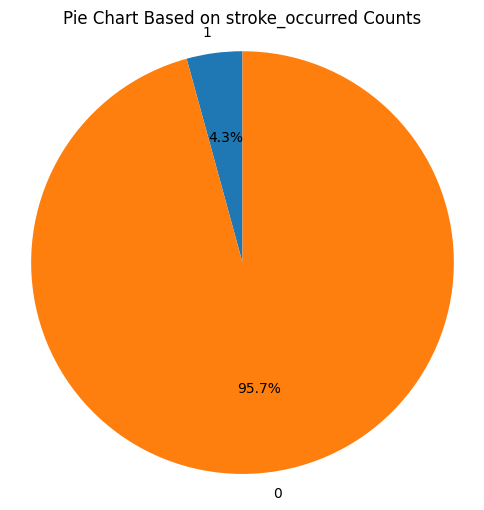

In [ ]:
# Create a pie chart
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart Based on stroke_occurred Counts")
plt.axis('equal')

# Show the pie chart
plt.show()

#*Create the Feature Vector and Divide the Dataset*#

In [ ]:
df=df.withColumnRenamed('stroke_occurred','LABEL')

In [ ]:
Features_List =['age','hypertension','heart_disease','avg_glucose_level','bmi','gender1','ever_married1','work_type1','Residence_type1','smoking_status1']

In [ ]:
assembler = VectorAssembler(inputCols = Features_List,outputCol = 'feature_vector')
dataframe = assembler.transform(df)
df.show()

+-----+----+------------+-------------+-----------------+---+-----+-------+-------------+----------+---------------+---------------+
|   id| age|hypertension|heart_disease|avg_glucose_level|bmi|LABEL|gender1|ever_married1|work_type1|Residence_type1|smoking_status1|
+-----+----+------------+-------------+-----------------+---+-----+-------+-------------+----------+---------------+---------------+
| 9046|67.0|           0|            1|           228.69| 36|    1|    1.0|          0.0|       0.0|            0.0|            2.0|
|31112|80.0|           0|            1|           105.92| 32|    1|    1.0|          0.0|       0.0|            1.0|            0.0|
|60182|49.0|           0|            0|           171.23| 34|    1|    0.0|          0.0|       0.0|            0.0|            3.0|
| 1665|79.0|           1|            0|           174.12| 24|    1|    0.0|          0.0|       1.0|            1.0|            0.0|
|56669|81.0|           0|            0|           186.21| 29|    1|  

In [ ]:
dataframe.show(5)

+-----+----+------------+-------------+-----------------+---+-----+-------+-------------+----------+---------------+---------------+--------------------+
|   id| age|hypertension|heart_disease|avg_glucose_level|bmi|LABEL|gender1|ever_married1|work_type1|Residence_type1|smoking_status1|      feature_vector|
+-----+----+------------+-------------+-----------------+---+-----+-------+-------------+----------+---------------+---------------+--------------------+
| 9046|67.0|           0|            1|           228.69| 36|    1|    1.0|          0.0|       0.0|            0.0|            2.0|[67.0,0.0,1.0,228...|
|31112|80.0|           0|            1|           105.92| 32|    1|    1.0|          0.0|       0.0|            1.0|            0.0|[80.0,0.0,1.0,105...|
|60182|49.0|           0|            0|           171.23| 34|    1|    0.0|          0.0|       0.0|            0.0|            3.0|(10,[0,3,4,9],[49...|
| 1665|79.0|           1|            0|           174.12| 24|    1|    0.0| 

In [ ]:
df_train,df_test= dataframe.randomSplit([0.3, 0.7], seed = 123)

In [ ]:
df_test.count()

3425

In [ ]:
df_train.count()

1484

#*APPLYING ML ALGORITHM TO THE PREPROCESSED DATA*

DECISION TREES

In [ ]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.types import IntegerType, DoubleType
from pyspark.ml.feature import StringIndexer, VectorAssembler,StandardScaler
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GBTClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.mllib.util import MLUtils
import seaborn as sns

In [ ]:
Decision_Tree_Classifier = DecisionTreeClassifier(labelCol = 'LABEL', featuresCol = 'feature_vector')
Decision_Tree_Model = Decision_Tree_Classifier.fit(df_train)

In [ ]:
Decision_Tree_Prediction = Decision_Tree_Model.transform(df_test)

In [ ]:
Decision_Tree_Prediction.show(5)

+---+----+------------+-------------+-----------------+---+-----+-------+-------------+----------+---------------+---------------+--------------------+-------------+--------------------+----------+
| id| age|hypertension|heart_disease|avg_glucose_level|bmi|LABEL|gender1|ever_married1|work_type1|Residence_type1|smoking_status1|      feature_vector|rawPrediction|         probability|prediction|
+---+----+------------+-------------+-----------------+---+-----+-------+-------------+----------+---------------+---------------+--------------------+-------------+--------------------+----------+
| 84|55.0|           0|            0|            89.17| 31|    0|    1.0|          0.0|       0.0|            0.0|            0.0|(10,[0,3,4,5],[55...| [262.0,16.0]|[0.94244604316546...|       0.0|
| 91|42.0|           0|            0|            98.53| 18|    0|    0.0|          1.0|       0.0|            0.0|            0.0|(10,[0,3,4,6],[42...|  [941.0,8.0]|[0.99157007376185...|       0.0|
| 99|31.0|

In [ ]:
Decision_Tree_Evaluator = MulticlassClassificationEvaluator(labelCol =  'LABEL', predictionCol = 'prediction')

In [ ]:
Decision_Tree_Accuracy = Decision_Tree_Evaluator.evaluate(Decision_Tree_Prediction)

In [ ]:
print('Decision Tree Accuracy is : ' + str(Decision_Tree_Accuracy * 100))
print('Test Error is : ' + str(1 - Decision_Tree_Accuracy))

Decision Tree Accuracy is : 93.42664434206254
Test Error is : 0.06573355657937452


RANDOM FOREST

In [ ]:
Random_Forest_Classifier = RandomForestClassifier(labelCol = 'LABEL', featuresCol = 'feature_vector',  maxDepth = 5,
    maxBins = 32, numTrees = 500)

Random_Forest_Model = Random_Forest_Classifier.fit(df_train)

In [ ]:
Random_Forest_Prediction = Random_Forest_Model.transform(df_test)

In [ ]:
Random_Forest_Prediction.show(5)

+---+----+------------+-------------+-----------------+---+-----+-------+-------------+----------+---------------+---------------+--------------------+--------------------+--------------------+----------+
| id| age|hypertension|heart_disease|avg_glucose_level|bmi|LABEL|gender1|ever_married1|work_type1|Residence_type1|smoking_status1|      feature_vector|       rawPrediction|         probability|prediction|
+---+----+------------+-------------+-----------------+---+-----+-------+-------------+----------+---------------+---------------+--------------------+--------------------+--------------------+----------+
| 84|55.0|           0|            0|            89.17| 31|    0|    1.0|          0.0|       0.0|            0.0|            0.0|(10,[0,3,4,5],[55...|[485.661124841626...|[0.97132224968325...|       0.0|
| 91|42.0|           0|            0|            98.53| 18|    0|    0.0|          1.0|       0.0|            0.0|            0.0|(10,[0,3,4,6],[42...|[493.168205934393...|[0.98633

In [ ]:
Random_Forest_Evaluator = MulticlassClassificationEvaluator(labelCol = 'LABEL', predictionCol = 'prediction')

In [ ]:
Random_Forest_Accuracy = Random_Forest_Evaluator.evaluate(Random_Forest_Prediction)

In [ ]:

print('Random Forest Accuracy is : ' + str(Random_Forest_Accuracy * 100))
print('Test Error is : ' + str(1 - Random_Forest_Accuracy))

Random Forest Accuracy is : 93.47968188255801
Test Error is : 0.06520318117441992


LOGISTIC REGRESSION


In [ ]:
Logistic_Regression_Classifier = LogisticRegression(regParam = 0.3, labelCol = "LABEL", featuresCol = 'feature_vector', \
                                       maxIter = 20,  elasticNetParam = 0.8)

In [ ]:
Logistic_Regression_Model = Logistic_Regression_Classifier.fit(df_train)

In [ ]:
Logistic_Regression_Prediction = Logistic_Regression_Model.transform(df_test)

Logistic_Regression_Prediction.show(5)

+---+----+------------+-------------+-----------------+---+-----+-------+-------------+----------+---------------+---------------+--------------------+--------------------+--------------------+----------+
| id| age|hypertension|heart_disease|avg_glucose_level|bmi|LABEL|gender1|ever_married1|work_type1|Residence_type1|smoking_status1|      feature_vector|       rawPrediction|         probability|prediction|
+---+----+------------+-------------+-----------------+---+-----+-------+-------------+----------+---------------+---------------+--------------------+--------------------+--------------------+----------+
| 84|55.0|           0|            0|            89.17| 31|    0|    1.0|          0.0|       0.0|            0.0|            0.0|(10,[0,3,4,5],[55...|[3.18438964879703...|[0.96024258760107...|       0.0|
| 91|42.0|           0|            0|            98.53| 18|    0|    0.0|          1.0|       0.0|            0.0|            0.0|(10,[0,3,4,6],[42...|[3.18438964879703...|[0.96024

In [ ]:
Logistic_Regression_Evaluator = MulticlassClassificationEvaluator(labelCol = "LABEL", predictionCol = "prediction", \
                                                     metricName = "accuracy")

In [ ]:
Logistic_Regression_Accuracy = Logistic_Regression_Evaluator.evaluate(Logistic_Regression_Prediction)

In [ ]:
print('Logistic Regression Accuracy is : ' + str(Logistic_Regression_Accuracy * 100))
print('Test Error is : ' + str(1 - Logistic_Regression_Accuracy))

Logistic Regression Accuracy is : 95.62043795620438
Test Error is : 0.04379562043795615


In [ ]:
LR=Logistic_Regression_Accuracy * 100
RF=Random_Forest_Accuracy * 100
DT=Decision_Tree_Accuracy * 100

In [ ]:
acc = [LR, DT,RF]
models = ['LR','DT','RF']

<Axes: xlabel='algorithm', ylabel='accuracy'>

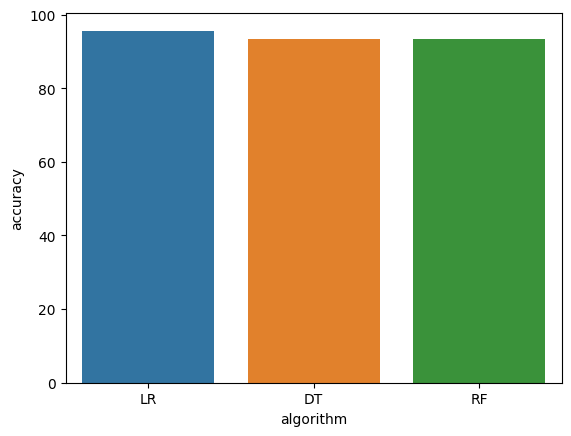

In [ ]:
import seaborn as sns
import pandas as pd
sns.barplot(data=pd.DataFrame({"algorithm":models,"accuracy":acc}),x="algorithm",y="accuracy")

#*Using pipeline concept*#

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

stag_dt=[assembler,Decision_Tree_Model]
stag_lr=[assembler,Logistic_Regression_Model]
stag_rf=[assembler,Random_Forest_Model]

DT = Pipeline(stages=stag_dt)
LR = Pipeline(stages=stag_lr)
RF = Pipeline(stages=stag_rf)

DT=DT.fit(train_data)
LR=LR.fit(train_data)
RF=RF.fit(train_data)

dt_pred,lr_pred,rf_pred= DT.transform(test_data) , LR.transform(test_data), RF.transform(test_data)

evaluator = MulticlassClassificationEvaluator(labelCol="LABEL", predictionCol="prediction", metricName="accuracy")
dt_acc = evaluator.evaluate(dt_pred)
lr_acc = evaluator.evaluate(lr_pred)
rf_acc = evaluator.evaluate(rf_pred)

print("\t\t\tTEST ACCURACY", f"DECISION TREE : {dt_acc:.2f}",f"LOGISTIC REGRESSION : {lr_acc:.2f}",f"RANDOM FOREST: {rf_acc:.2f}",sep='\n')

			TEST ACCURACY
DECISION TREE : 0.96
LOGISTIC REGRESSION : 0.96
RANDOM FOREST: 0.96


In [ ]:
acc = [lr_acc,dt_acc,rf_acc]
models = ['LR','DT','RF']

<Axes: xlabel='algorithm', ylabel='accuracy'>

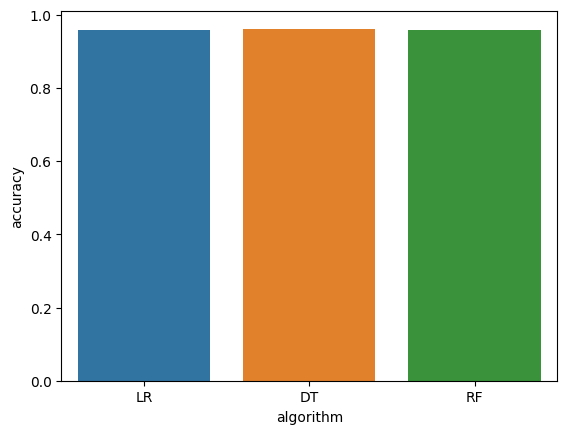

In [ ]:
import seaborn as sns
import pandas as pd
sns.barplot(data=pd.DataFrame({"algorithm":models,"accuracy":acc}),x="algorithm",y="accuracy")

#**ML Models**

**NAIVE BAYES ALGORITHM**

In [ ]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [ ]:
nb = NaiveBayes(labelCol="LABEL", featuresCol="feature_vector")

# Define a parameter grid for hyperparameter tuning
paramGrid = (ParamGridBuilder()
             .addGrid(nb.smoothing, [0.0, 0.2, 0.4, 0.6, 0.8, 1.0])  # Tune the smoothing parameter
             .build())

# Create a cross-validator
evaluator = MulticlassClassificationEvaluator(labelCol="LABEL", predictionCol="prediction", metricName="accuracy")
crossval = CrossValidator(estimator=nb,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=5)  # You can adjust the number of folds

# Fit the model to the training data
cv_model = crossval.fit(df_train)

# Get the best model
best_model = cv_model.bestModel

# Make predictions on the test data using the best model
predictions = best_model.transform(df_test)

# Evaluate the best model's performance
accuracy = evaluator.evaluate(predictions)
print(f"Best Model Accuracy: {accuracy}")

Best Model Accuracy: 0.8344525547445255


**DECISION TREE ALGORITHM**

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(labelCol="LABEL", featuresCol="feature_vector")

# Define a parameter grid for hyperparameter tuning
paramGrid = (ParamGridBuilder()
             .addGrid(dt.maxDepth, [3, 5, 7, 9])  # Tune the maximum depth of the tree
             .addGrid(dt.maxBins, [16, 32, 64])  # Tune the maximum number of bins for discretizing continuous features
             .build())

# Create a cross-validator
evaluator = MulticlassClassificationEvaluator(labelCol="LABEL", predictionCol="prediction", metricName="accuracy")
crossval = CrossValidator(estimator=dt,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=5)  # You can adjust the number of folds

# Fit the model to the training data
cv_model = crossval.fit(df_train)

# Get the best model
best_model = cv_model.bestModel

# Make predictions on the test data using the best model
predictions = best_model.transform(df_test)

# Evaluate the best model's performance
accuracy = evaluator.evaluate(predictions)
print(f"Best Model Accuracy: {accuracy}")

Best Model Accuracy: 0.9535766423357664


**RANDOM FOREST ALGORITHM**

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

In [ ]:
# Create a Random Forest model
rf = RandomForestClassifier(labelCol="LABEL", featuresCol="feature_vector")

# Define a parameter grid for hyperparameter tuning
paramGrid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [10, 20, 30])  # Tune the number of trees
             .addGrid(rf.maxDepth, [5, 10, 15])  # Tune the maximum depth of trees
             .build())

# Create a cross-validator
evaluator = MulticlassClassificationEvaluator(labelCol="LABEL", predictionCol="prediction", metricName="accuracy")
crossval = CrossValidator(estimator=rf,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=5)  # You can adjust the number of folds

# Fit the model to the training data
cv_model = crossval.fit(df_train)

# Get the best model
best_model = cv_model.bestModel

# Make predictions on the test data using the best model
predictions = best_model.transform(df_test)

# Evaluate the best model's performance
accuracy = evaluator.evaluate(predictions)
print(f"Best Model Accuracy: {accuracy}")

Best Model Accuracy: 0.9564963503649635


**LOGISTIC REGRESSSION ALGORITHM**

In [ ]:
from pyspark.ml.classification import LogisticRegression

In [ ]:
lr = LogisticRegression(labelCol="LABEL", featuresCol="feature_vector")

# Define a parameter grid for hyperparameter tuning
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.1, 1.0])  # Tune the regularization parameter
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])  # Tune the elastic net mixing parameter
             .build())

# Create a cross-validator
evaluator = BinaryClassificationEvaluator(labelCol="LABEL", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=5)  # You can adjust the number of folds

# Fit the model to the training data
cv_model = crossval.fit(df_train)

# Get the best model
best_model = cv_model.bestModel

# Make predictions on the test data using the best model
predictions = best_model.transform(df_test)

# Evaluate the best model's performance
areaUnderROC = evaluator.evaluate(predictions)
print(f"Best Model Area Under ROC: {areaUnderROC}")

Best Model Area Under ROC: 0.8580763358778654


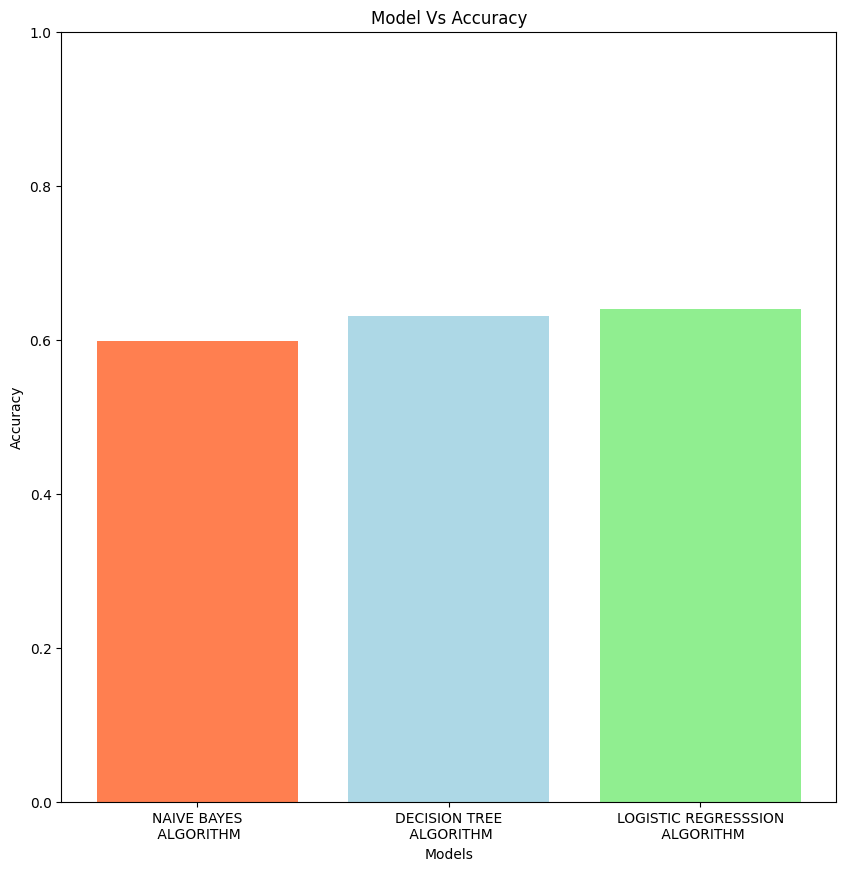

In [ ]:
import matplotlib.pyplot as plt
model_names = ['NAIVE BAYES\n ALGORITHM', 'DECISION TREE\n ALGORITHM', 'LOGISTIC REGRESSSION\n ALGORITHM','RANDOM FOREST\n ALGORITHM']
accuracies = [0.5986376385735275,0.9535766423357664,0.8580763358778654, 0.9564963503649635]

# Create a bar graph
plt.figure(figsize=(10, 10))
plt.bar(model_names, accuracies, color=['coral', 'lightblue', 'lightgreen','black'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Vs Accuracy')


plt.ylim(0, 1.0)
plt.show()
